In [18]:
%matplotlib inline

In [19]:
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
plt.rcParams['figure.figsize'] = (16, 8)
sns.set()

We will use the table *Life expectancy (years)* from http://www.gapminder.org/data/ to perform analysis of life expectancy in Ukraine during 30s by comparison with a few other countries.

In [7]:
r = requests.get('https://docs.google.com/spreadsheets/d/1H3nzTwbn8z4lJ5gJ_WfDgCeGEXK3PVGcNjQ_U5og8eo/pub?output=csv')
data = io.StringIO(r.content.decode("utf-8"))

In [8]:
life_frame = pd.read_csv(data, index_col=0)

In [12]:
life_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, Abkhazia to South Sudan
Columns: 217 entries, 1800 to 2016
dtypes: float64(217)
memory usage: 442.8+ KB


In [13]:
countries_of_interest = ['Ukraine', 'Russia', 'Poland', 'Belarus', 'Kazakhstan', 'Germany']

In [34]:
df = life_frame.loc[countries_of_interest, :].T
df.index = pd.to_datetime(df.index)

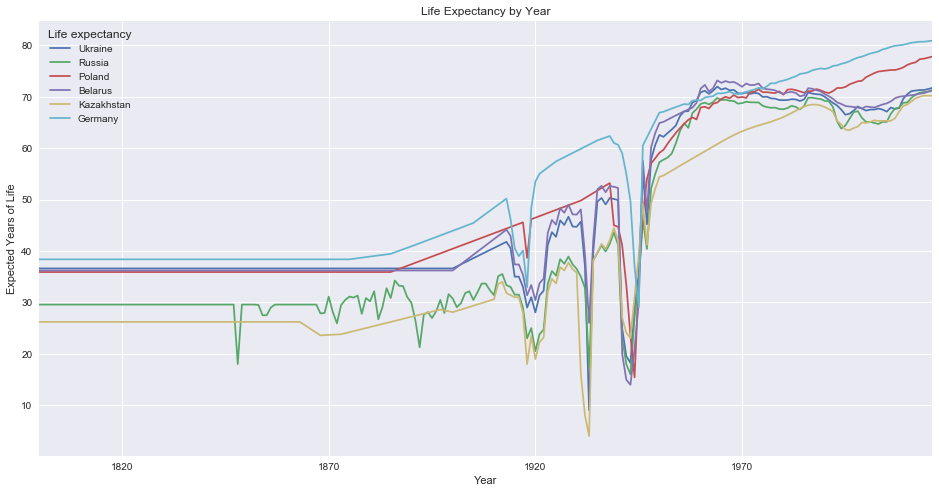

In [58]:
_ = df.plot.line(title='Life Expectancy by Year')
plt.xlabel('Year')
plt.ylabel('Expected Years of Life')
plt.show()

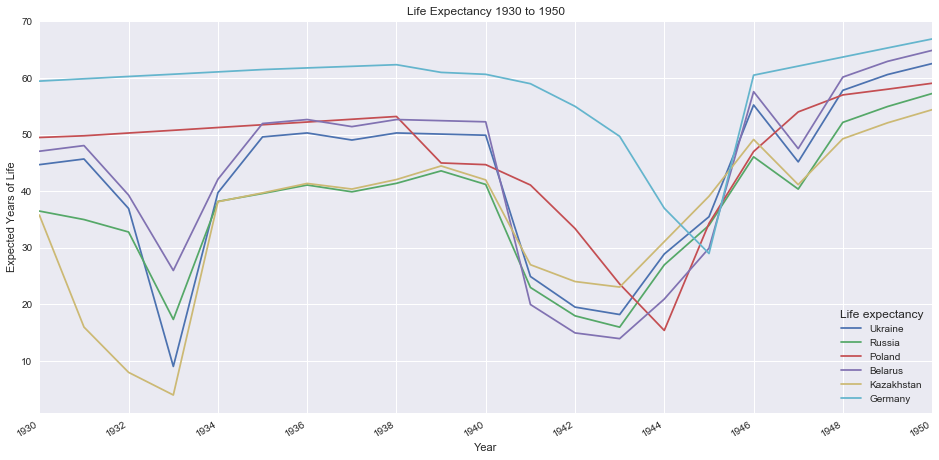

In [59]:
_ = df.loc['1930':'1950', :].plot.line(title='Life Expectancy 1930 to 1950', x_compat=True)
plt.xlabel('Year')
plt.ylabel('Expected Years of Life')
plt.show()

In [64]:
df.loc['1930':'1935']

Life expectancy,Ukraine,Russia,Poland,Belarus,Kazakhstan,Germany
1930-01-01,44.70,36.50,49.50,47.07,35.79,59.46
1931-01-01,45.70,35.00,49.80,48.07,16.00,59.87
1932-01-01,36.95,32.80,50.29,39.32,8.00,60.28
1933-01-01,9.05,17.35,50.77,26.00,4.00,60.68
1934-01-01,39.75,38.20,51.26,42.12,38.15,61.09
1935-01-01,49.60,39.60,51.75,51.97,39.71,61.50
